In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score


In [ ]:
df = pd.read_csv("smartcart_customers.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response'],
      dtype='object')

#Data Cleaning & Pre-processing

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].mode()[0])

In [ ]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response


In [ ]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
df['Education'] = df['Education'].replace({
    'Graduation' : 'Graduate',
    'PhD' : 'Postgraduate',
    'Master' : 'Postgraduate',
    '2n Cycle' : 'Postgraduate',
    'Basic' : 'Under_graduate'
})

In [ ]:
df['Marital_Status'].value_counts()


,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married' : 'Couple',
    'Together' : 'Couple',
    'Divorced' : 'Single',
    'Widow' : 'Single',
    'Alone' : 'Single',
    'YOLO' : 'Single',
    'Absurd' : 'Single',

})

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [ ]:
catagiries = df[['Education', 'Marital_Status']]
ohe = OneHotEncoder()
catagiries_arr = ohe.fit_transform(catagiries)

In [ ]:

catagiries_df = pd.DataFrame(catagiries_arr.toarray(), columns= ohe.get_feature_names_out(), index=df.index)


In [ ]:
df_cleaned = pd.concat(
    [df.drop(
        columns= list(catagiries.columns)+["ID"]
        ), catagiries_df
     ], axis = 1)
df_cleaned.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Education_Graduate,Education_Postgraduate,Education_Under_graduate,Marital_Status_Couple,Marital_Status_Single
0,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,...,10,4,7,0,1,1.0,0.0,0.0,0.0,1.0
1,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,...,1,2,5,0,0,1.0,0.0,0.0,0.0,1.0
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,...,2,10,4,0,0,1.0,0.0,0.0,1.0,0.0
3,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,...,0,4,6,0,0,1.0,0.0,0.0,1.0,0.0
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,...,3,6,5,0,0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_cleaned['Age'] = pd.Timestamp.now().year - df_cleaned['Year_Birth']

In [ ]:
df_cleaned['Customer'] = (pd.Timestamp.now() - df_cleaned['Dt_Customer']).dt.days

In [ ]:
df_cleaned = df_cleaned.drop(columns = ['Year_Birth', 'Dt_Customer'])

#Feature Engineering


In [ ]:
df_cleaned.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Education_Graduate', 'Education_Postgraduate',
       'Education_Under_graduate', 'Marital_Status_Couple',
       'Marital_Status_Single', 'Age', 'Customer'],
      dtype='object')

In [ ]:
cols = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'Kidhome',
    'Teenhome'
]
df_cleaned['Total_spend'] = df_cleaned[cols[:-2]].sum(axis = 1)
df_cleaned['Childerns'] = df_cleaned[cols[-2:]].sum(axis = 1)

In [ ]:
df_cleaned = df_cleaned.drop(columns = cols)

#Outliers

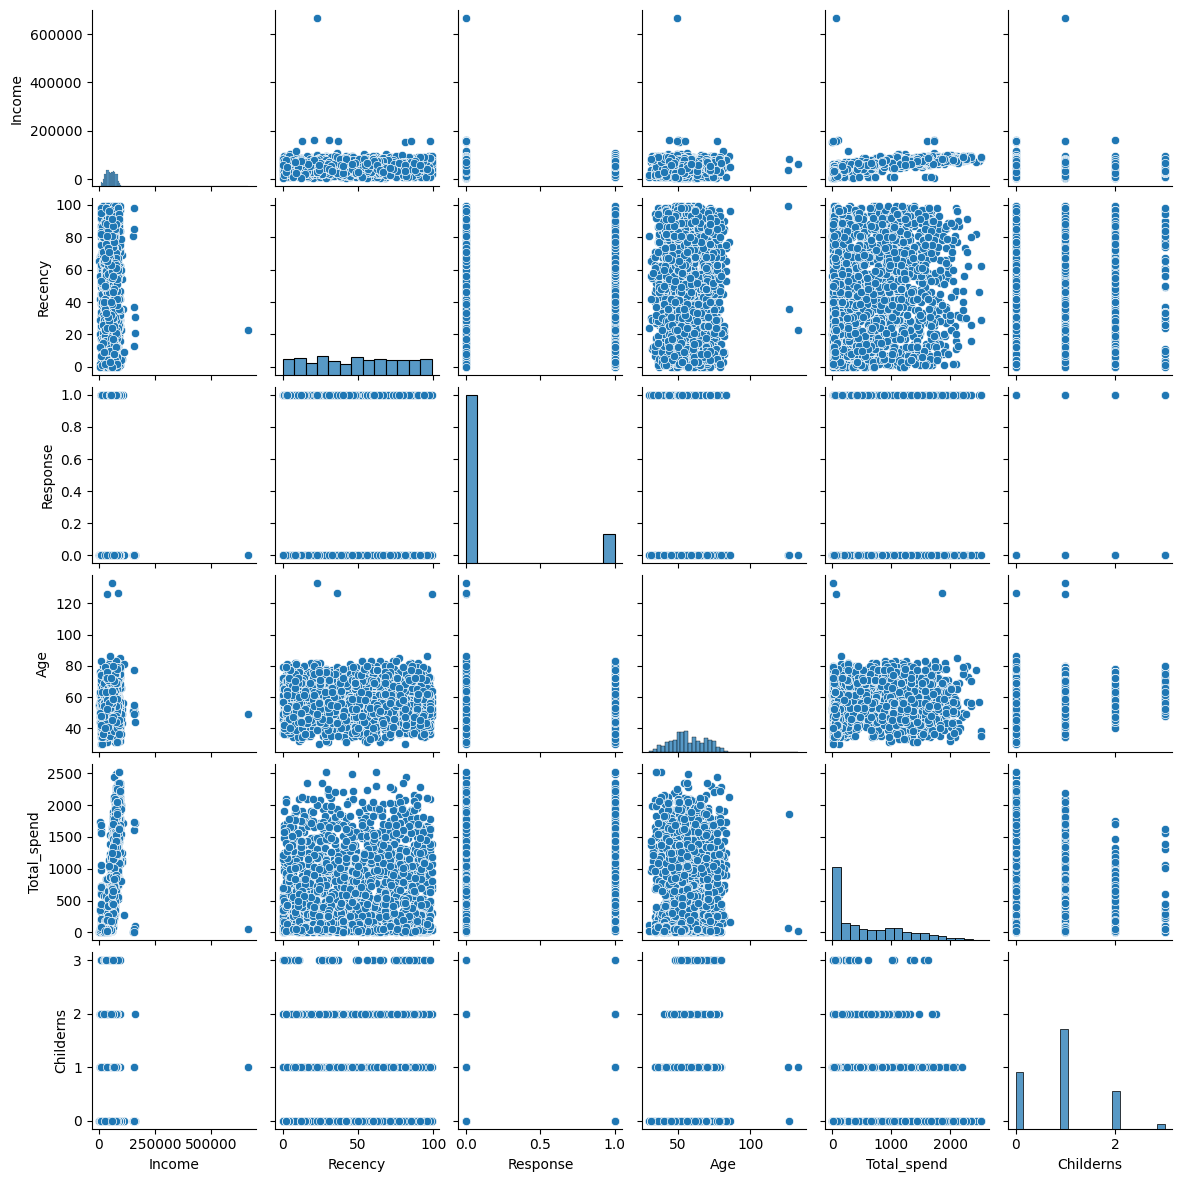

In [ ]:
cols = ["Income", 'Recency', 'Response', 'Age', 'Total_spend', 'Childerns']

sns.pairplot(df_cleaned[cols], height=2, aspect=1)


In [ ]:
print(df_cleaned['Income'].max())
print(df_cleaned['Age'].max())

666666.0
133


- Age has maximum 133
- Income has outliers greater then 600000


In [ ]:
df_cleaned_ot = df_cleaned[(df_cleaned['Age'] < 90 )]
df_cleaned_ot =  df_cleaned_ot[(df_cleaned_ot['Income'] < 600_000 )]


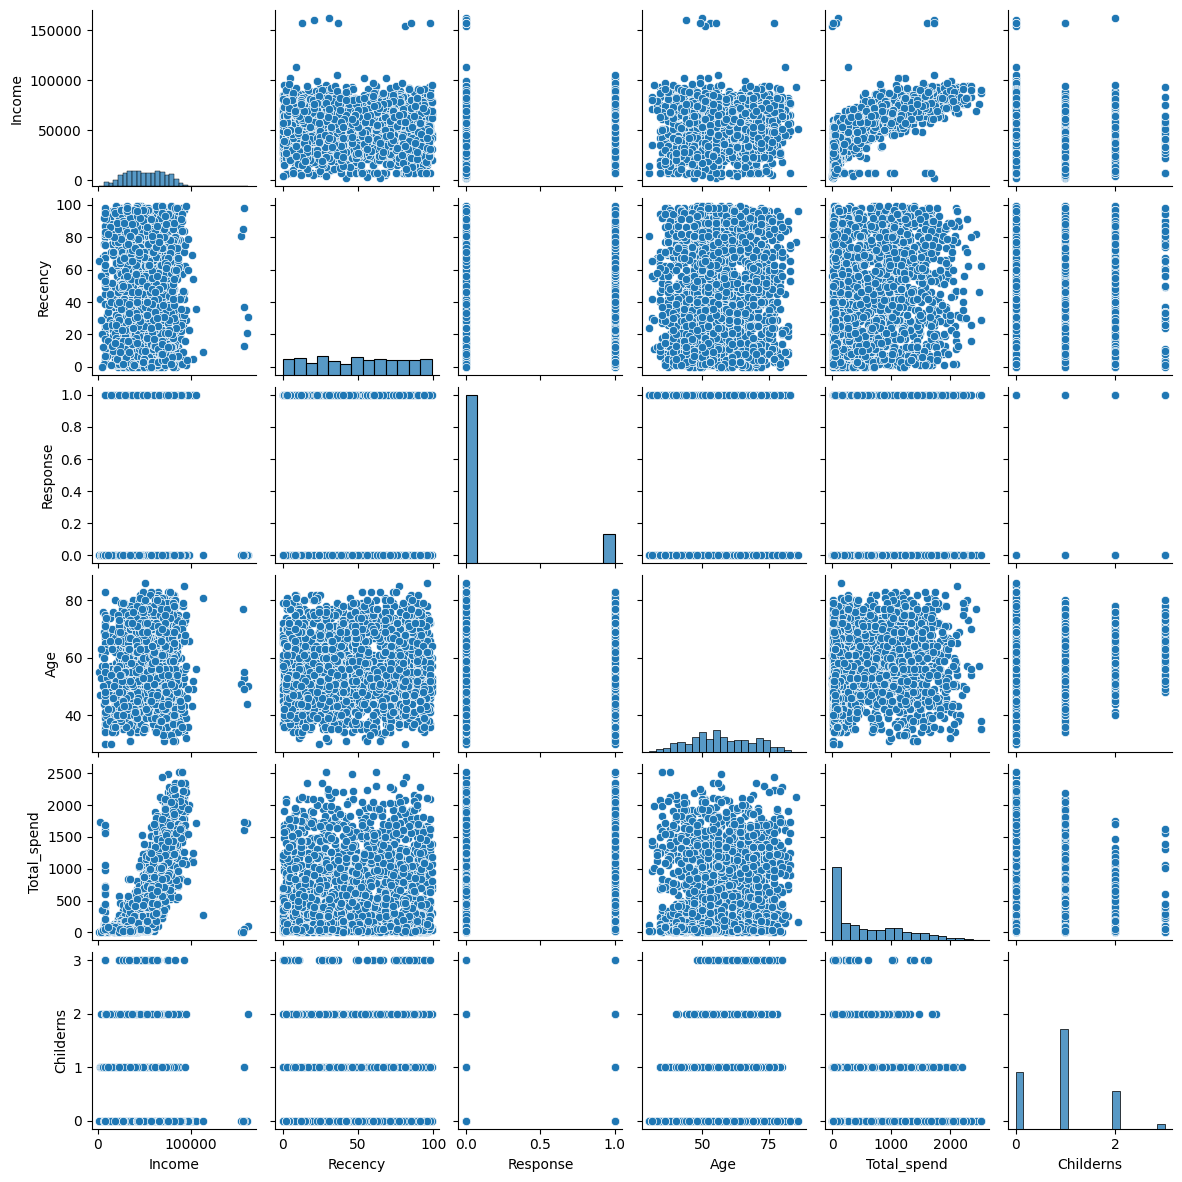

In [ ]:
sns.pairplot(df_cleaned_ot[cols], height=2, aspect=1)

In [ ]:
df_cleaned_ot.shape

(2236, 18)

#Heatmap

<Axes: >

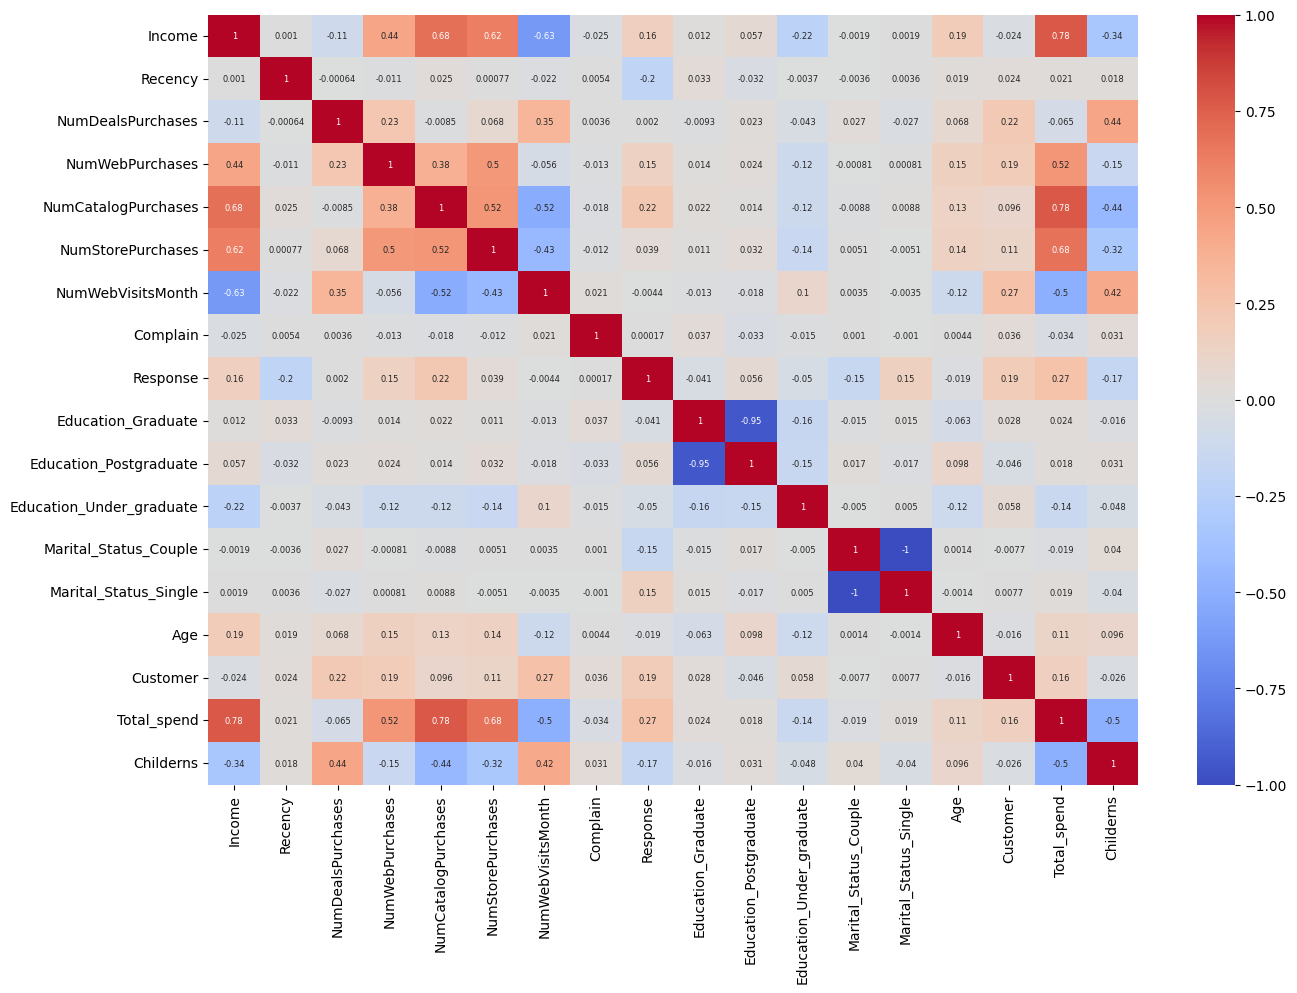

In [ ]:
corr = df_cleaned_ot.corr(numeric_only=True)
plt.figure(figsize = (15, 10))
sns.heatmap(
    corr,
    annot = True,
    annot_kws = {'size': 6},
    cmap = 'coolwarm'
)

***<u>Key Insights from HeatMap</u>***
- Income - Total_spend has a high positive relation
- Income - NumCatalogPurchases has a high positive relation
- Income - NumWebVisitPerMunth has a high negative relation



***<u>Conclusion</u>***

Users with high income are willing to purchase more, they spend less time in web application and they are comfortable with Catalog purchase

#Scaling

In [ ]:
X = df_cleaned_ot
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Visualize

In [ ]:
X_scaled.shape

(2236, 18)

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
pca.explained_variance_ratio_

array([0.23113354, 0.1144143 , 0.1097125 ])

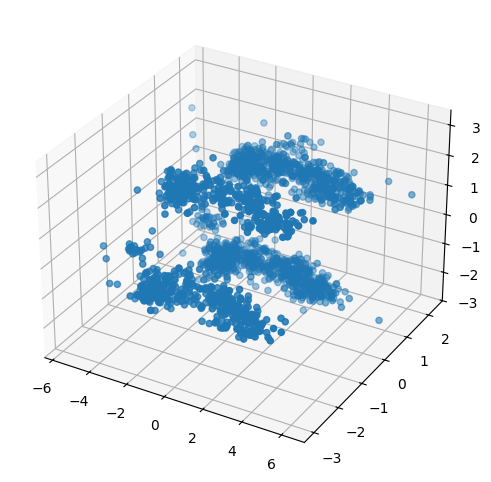

In [ ]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])

#Model Training

In [ ]:
kmeans = KMeans(random_state=42)
labels_scaled = kmeans.fit_predict(X_scaled)
labels_pca = kmeans.fit_predict(X_pca)
print("Silhouette Scaled:", silhouette_score(X_scaled, labels_scaled))
print("Silhouette PCA:", silhouette_score(X_pca, labels_pca))

Silhouette Scaled: 0.15738888638830137
Silhouette PCA: 0.5531961069235256


- Silhouette Score is better when used PCA dataset

In [ ]:
elbow = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit_predict(X_pca)
  elbow.append(kmeans.inertia_)

<Axes: >

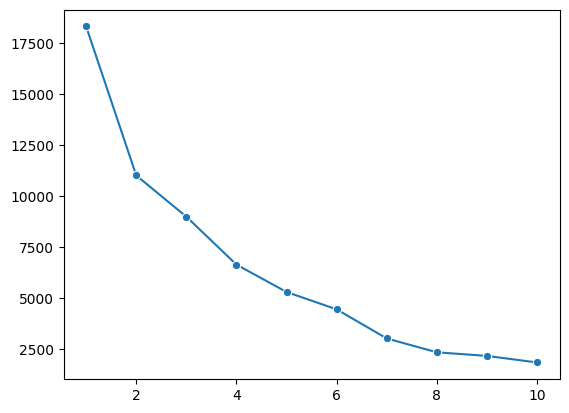

In [ ]:
sns.lineplot(x=range(1,11), y = elbow, marker = 'o')

In [ ]:
knee = KneeLocator(range(1,11), elbow, curve='convex', direction='decreasing')
print(knee.elbow)

4


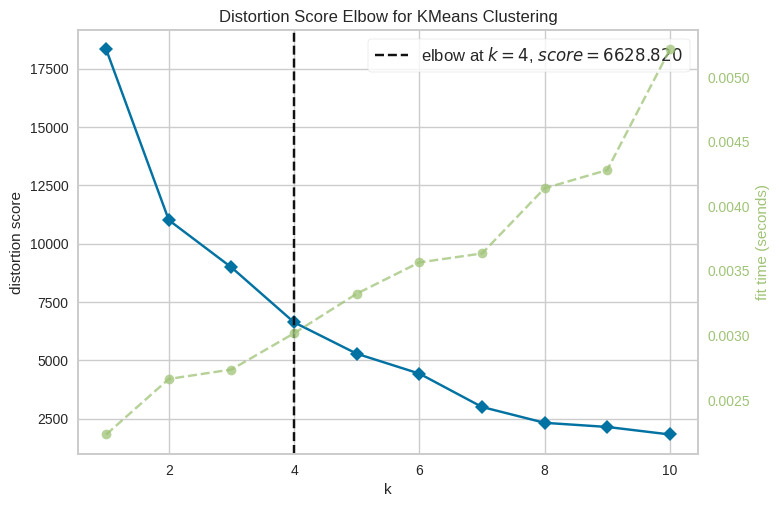

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import kelbow_visualizer

model = KMeans(random_state=42)

visualizer =  kelbow_visualizer(model,X_pca, k=(1,11))
visualizer.fit(X_pca)
visualizer.show()

- Taking Cluster value as 4

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
label_kmeans = kmeans.fit_predict(X_pca)

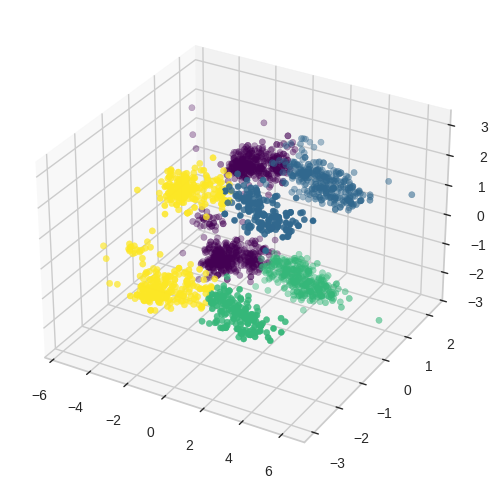

In [ ]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=label_kmeans,
    cmap = 'viridis'
    )

In [ ]:
agg_clf = AgglomerativeClustering(n_clusters=4)
labels_clf = agg_clf.fit_predict(X_pca)

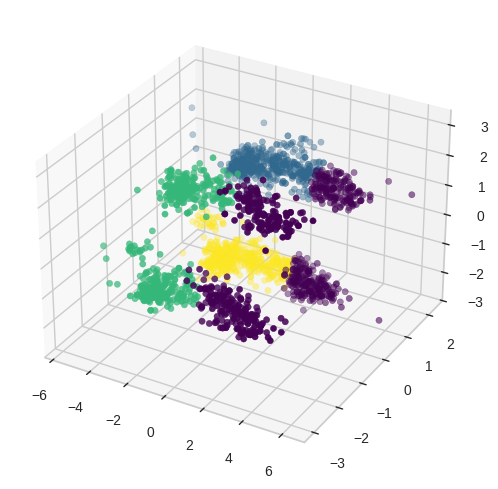

In [ ]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=labels_clf,
    cmap = 'viridis'
    )

***<u>Key Insights ploting labeled clusters</u>***
- KMeans Clustering is working better then Agglomerative Clustering

# Characterization of Clusters

In [ ]:

df_cleaned_ot['clusters'] = label_kmeans

In [ ]:
df_cleaned_ot.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Education_Graduate,Education_Postgraduate,Education_Under_graduate,Marital_Status_Couple,Marital_Status_Single,Age,Customer,Total_spend,Childerns,clusters
0,58138.0,58,3,8,10,4,7,0,1,1.0,0.0,0.0,0.0,1.0,69,4925,1617,0,2
1,46344.0,38,2,1,1,2,5,0,0,1.0,0.0,0.0,0.0,1.0,72,4375,27,2,3
2,71613.0,26,1,8,2,10,4,0,0,1.0,0.0,0.0,1.0,0.0,61,4574,776,0,2
3,26646.0,26,2,2,0,4,6,0,0,1.0,0.0,0.0,1.0,0.0,42,4401,53,1,0
4,58293.0,94,5,5,3,6,5,0,0,0.0,1.0,0.0,1.0,0.0,45,4423,422,1,0


<Axes: xlabel='clusters', ylabel='count'>

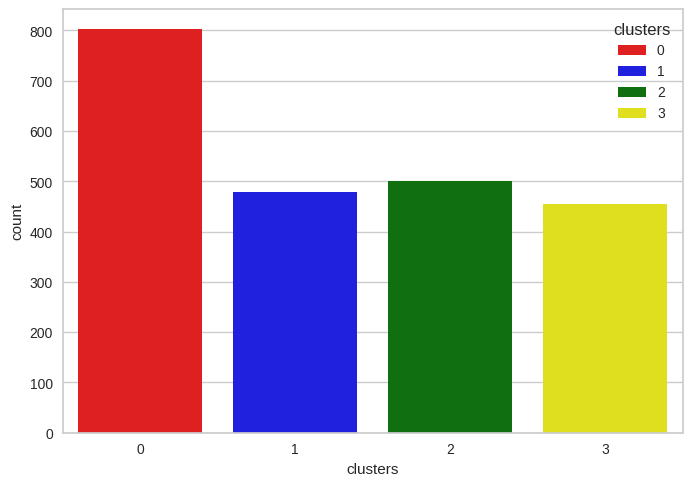

In [ ]:
colors = ['red', 'blue', 'green', 'yellow']

sns.countplot(x = df_cleaned_ot['clusters'], palette= colors, hue = df_cleaned_ot['clusters'])

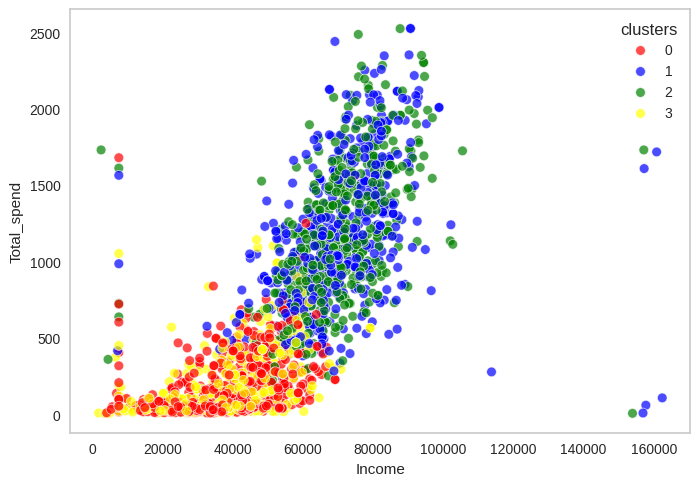

In [ ]:
sns.scatterplot(x = df_cleaned_ot['Income'],y = df_cleaned_ot['Total_spend'], hue = df_cleaned_ot['clusters'], palette=colors, alpha = 0.7)
plt.grid(False)

***<u>Key Insights from relation between clusters</u>***
- cluster 0 & 3 both has low income, low spend ratio where 0 has majority in numbers
- cluster 1 & 2 both are high income. high spend ratio

In [58]:
df_cleaned_ot.groupby('clusters').mean().piv

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Education_Graduate,Education_Postgraduate,Education_Under_graduate,Marital_Status_Couple,Marital_Status_Single,Age,Customer,Total_spend,Childerns
clusters,,,,,,,,,,,,,,,,,,
0,36428.239401,49.587282,2.532419,2.778055,0.736908,3.698254,6.539900,0.009975,0.068579,0.490025,0.467581,0.042394,1.000000,0.000000,55.280549,4603.796758,160.125935,1.279302
1,70291.313808,48.184100,2.171548,5.822176,4.981172,8.487448,3.910042,0.004184,0.255230,0.000000,1.000000,0.000000,0.658996,0.341004,60.441423,4638.684100,1158.182008,0.556485
2,70808.800399,50.083832,1.924152,5.686627,5.143713,8.429142,3.588822,0.009980,0.185629,1.000000,0.000000,0.000000,0.648703,0.351297,58.081836,4622.988024,1181.113772,0.520958
3,36973.591209,48.200000,2.567033,2.813187,0.892308,3.764835,6.551648,0.010989,0.140659,0.509890,0.446154,0.043956,0.000000,1.000000,55.725275,4604.870330,178.496703,1.259341




>  ***Conclusion***


 <table class="overview-table">
      <thead>
        <tr>
          <th>Cluster</th>
          <th>Segment Name</th>
          <th>Avg Income</th>
          <th>Total Spend</th>
          <th>Avg Age</th>
          <th>Primary Channel</th>
          <th>Key Trait</th>
        </tr>
      </thead>
      <tbody>
        <tr class="c0">
          <td><span class="tag c0">Cluster 0</span></td>
          <td style="font-weight:600">Mid-Income Moderate Buyers</td>
          <td>$36,428</td>
          <td>$4,603</td>
          <td>55.3</td>
          <td>In-Store</td>
          <td>Value-conscious couples with children</td>
        </tr>
        <tr class="c1">
          <td><span class="tag c1">Cluster 1</span></td>
          <td style="font-weight:600">High-Income Premium Shoppers</td>
          <td>$70,291</td>
          <td>$4,637</td>
          <td>60.4</td>
          <td>Omnichannel</td>
          <td>Affluent postgrads, power buyers</td>
        </tr>
        <tr class="c2">
          <td><span class="tag c2">Cluster 2</span></td>
          <td style="font-weight:600">High-Income Digital-First Buyers</td>
          <td>$70,809</td>
          <td>$4,623</td>
          <td>58.1</td>
          <td>Digital + Store</td>
          <td>Digitally engaged graduates</td>
        </tr>
        <tr class="c3">
          <td><span class="tag c3">Cluster 3</span></td>
          <td style="font-weight:600">Lower-Income Cautious Shoppers</td>
          <td>$36,974</td>
          <td>$4,605</td>
          <td>55.7</td>
          <td>In-Store</td>
          <td>Budget-aware single parents</td>
        </tr>
      </tbody>
  </table>